# Customer Segmentation with K-Means and PCA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (3).csv


In [3]:
print(uploaded.keys())

dict_keys(['Mall_Customers (3).csv'])


In [5]:
df = pd.read_csv(io.BytesIO(uploaded['Mall_Customers (3).csv']))
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Drop CustomerID and convert Gender to numeric
df_clean = df.drop('CustomerID', axis=1)
df_clean['Gender'] = df_clean['Gender'].map({'Male': 0, 'Female': 1})

df_clean.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)


In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.33690046 0.26230645]


In [9]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_pca)

In [10]:
df['Cluster'] = clusters
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

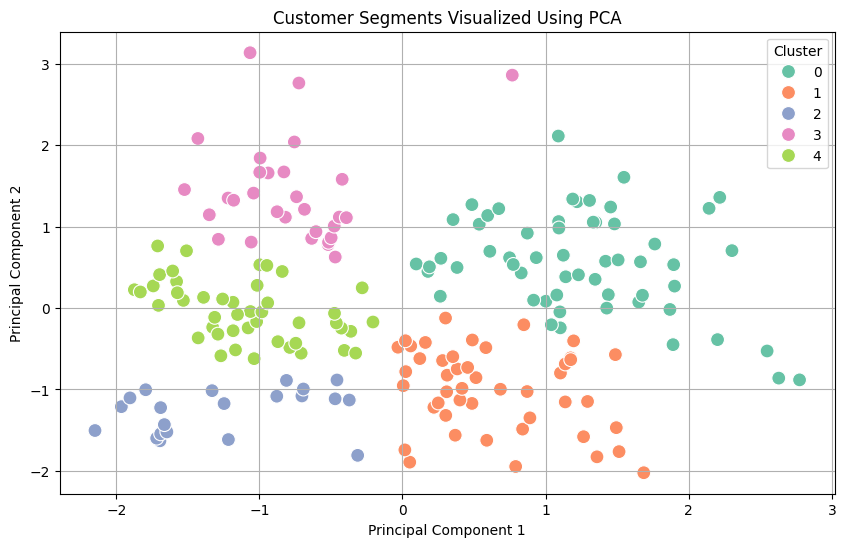

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title("Customer Segments Visualized Using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

In [12]:
df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,49.157895,70.210526,28.719298
1,48.326087,46.652174,37.282609
2,27.142857,30.809524,68.142857
3,31.066667,85.700000,72.766667
4,27.021739,59.695652,66.826087


In [13]:
df.to_csv("Customer_Segmentation_Result.csv", index=False)

In [14]:
from google.colab import files
files.download("Customer_Segmentation_Result.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>